# Probability

This assignment has automatically graded part (Expected value and variance) and peer review graded (Visualizing De Moivre–Laplace theorem). After you submit your work to automatic grading, you have to download Notebook (ipynb) file and upload it for peer review grading (in appropriate course element).

## De Moivre–Laplace theorem
Consider sequence of independent Bernoulli random variables $X_1, \ldots, X_n$, each $X_i$ takes value $1$ with probability $p$ and value 0 with probability $1-p$, $i=1,\ldots, n$. Recall that expected value of each $X_i$ is $p$ and its variance is $p(1-p)$. Let 

$$\bar X = \frac{X_1 + \ldots + X_n}{n}.$$ 

Consider $Z$-statistics:

$$Z = \frac{\bar X - p}{\sqrt{p(1-p)}}\sqrt{n} = \frac{X_1 + \ldots + X_n - np}{n\sqrt{p(1-p)}}\sqrt{n}=\frac{X_1+\ldots+X_n-np}{\sqrt{np(1-p)}}.$$
Let us denote $X_1+\ldots+X_n$ by $Y$. Then $Y$ is binomially distributed (with probability of success $p$ and number of trials $n$). Central limit theorem says that $Z$-statistics is approximately distributed with standard normal law. It means that random variable

$$Z=\frac{Y-np}{\sqrt{np(1-p)}}$$
is approximately distributed with standard normal law. Let us express $Y$ in terms of $Z$:

$$Y = \sqrt{np(1-p)} Z + np$$

As $Z$ is approximately standard normal, $Y$ is also approximately normal (but not standard normal). This result is also known as de Moivre–Laplace theorem. Let us check it with Python.

### Expected value and variance
Assume that $\tilde Z$ is standard Gaussian random variable (i.e. distributed under standard normal law) and

$$\tilde Y = \sqrt{np(1-p)} \tilde Z + np$$

Then $Z$ is also normally distributed with expected value $m$ and variance $\sigma^2$. Implement function `moments(n, p)` that returns pair `(m, s2)` of values $m$ and $\sigma^2$.

In [1]:
import numpy as np
import math
import statistics

def moments(n, p):
    # your code here
    
    # mean and varians for the standard deviation
    mu, sigma_squared = 0, 1 

    # EY = E(sqrt(n*p*(1-p)) * Z + n*p) = 
    # = sqrt(n*p*(1-p)) * E(Z) + n*p = sqrt(n*p*(1-p)) * E(Z) + n*p
    
    m = math.sqrt(n * p * (1 - p)) * mu + n * p
    
    # VarY = Var(sqrt(n*p*(1-p)) * Z + n*p) = 
    # = sqrt(n*p*(1-p))**2 * Var(Z) = n*p*(1-p) * Var(Z)
       
    s2 = (n * p * (1 - p)) * sigmasigma_squared
    
    return m, s2

In [2]:
print(moments(5, 0.5))
print(moments(10, 0.2))

(2.5, 1.25)
(2.0, 1.6)


In [3]:
assert moments(5, 0.5) == (2.5, 1.25)
assert moments(10, 0.2) == (2, 1.6)

### Visualizing De Moivre–Laplace theorem

Write a function `de_moivre_laplace(n, p)` that plots PMF of binomial random variable with given $n$ and $p$ and PDF of normal random variable with expected value and variance found previously at the same graph. Plot PMF using points with integer x-values. Both plots should be done on segment $[0, n + 1]$.

In [23]:
from scipy.stats import norm, binom
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# your code here

def de_moivre_laplace(n, p):

    # defining list of values
    x = np.arange(0, n + 2)
    
    # list of pmf values of binomial random variable with given n and p 
    binomial_pmf = binom.pmf(x, n, p)
    
    # find variable for the required normal distribution
    m, s2 = moments(n, p)
    sigma = math.sqrt(s2)
 
    
    # plotting the graph 
    # binomial
    plt.plot(x, binomial_pmf, 'o', label=f"Binomial(n={n}, p={p})")
    # normal
    x = np.linspace(0,n + 1,1000)
    plt.plot(x, stats.norm.pdf(x, m, sigma), color='green', label=f"Normal(m={round(m, 2)}, sigma={round(sigma, 2)})")

    plt.legend(loc="upper right")
    plt.show()


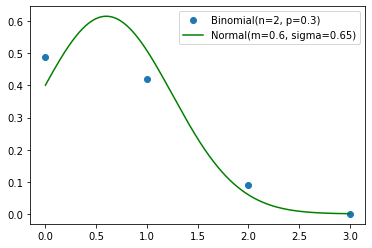

In [24]:
de_moivre_laplace(2, 0.3)

**Peer review grading.** Picture above this cell should coincide with picture below this cell.

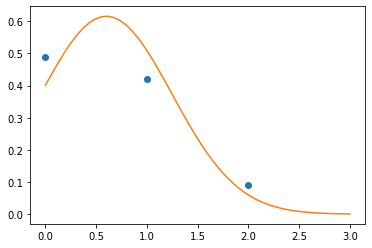

In [25]:
# some magic to show correct figure
n, p = (np.array([0.49, 0.42, 0.09]),
 np.array([0.4010137 , 0.43571865, 0.46922059, 0.50080882, 0.52977427,
        0.55543563, 0.57716581, 0.59441731, 0.6067451 , 0.61382574,
        0.61547143, 0.61163833, 0.60242844, 0.58808517, 0.56898259,
        0.54560923, 0.51854736, 0.48844889, 0.45600943, 0.42194175,
        0.38695027, 0.35170764, 0.31683448, 0.28288313, 0.25032583,
        0.21954738, 0.19084238, 0.1644165 , 0.14039122, 0.1188115 ,
        0.09965543, 0.08284523, 0.06825869, 0.0557407 , 0.04511396,
        0.03618873, 0.02877132, 0.02267098, 0.01770535, 0.01370449,
        0.01051345, 0.00799377, 0.00602396, 0.00449921, 0.00333054,
        0.00244353, 0.00177682, 0.00128054, 0.00091468, 0.00064754]))
plt.plot(np.arange(0, 3), n, 'o')
plt.plot(np.linspace(0, 3), p)

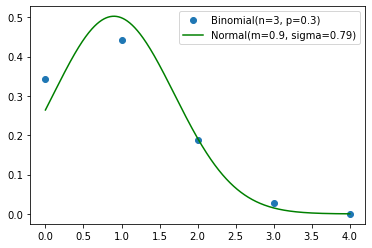

In [26]:
de_moivre_laplace(3, 0.3)

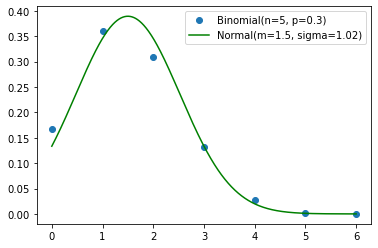

In [27]:
de_moivre_laplace(5, 0.3)

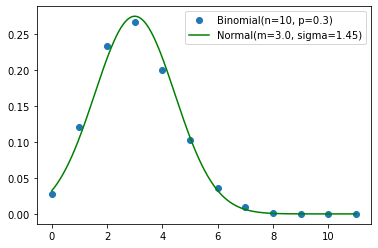

In [28]:
de_moivre_laplace(10, 0.3)

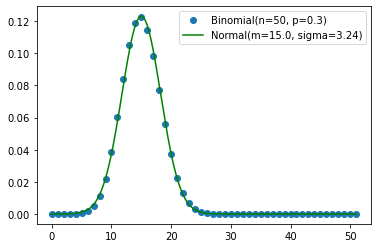

In [29]:
de_moivre_laplace(50, 0.3)

**Peer review grading.** Points should approach a curve.